In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import polyphase
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
M = [1,1,1,1] 
chi = 3.10*np.ones(int(0.5*4*(4-1)))
# M = [5,5,1,1] 
# chi = [1,0.5,0.5,0.5,0.5,1]

f = lambda x : polyphase.flory_huggins(x, M, chi)
engine = polyphase.PHASE(f,100,4)
engine.compute()
boundary_points = np.asarray([engine.is_boundary_point(x) for x in engine.grid.T])

Computation took 132.07s


## Plot slices of landscape along $\phi_4$

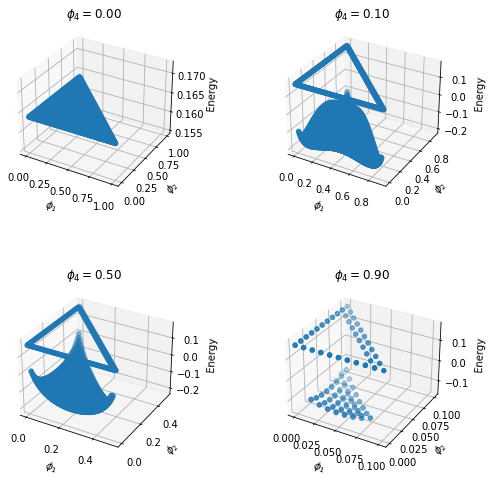

In [4]:
PLOT_BOUNDARIES = False # set it to True if you'd like to remove the boundary corrected energy

fig, axs = plt.subplots(2,2,figsize=(2*4,2*4),subplot_kw={'projection':'3d'})
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axs = axs.flatten()
for ax,PHI4 in zip(axs,[1e-8,0.1,0.5,0.9]):
    slice_ids = np.isclose(engine.grid[3,:],PHI4, atol=0.01)
    if PLOT_BOUNDARIES:
        ids = np.logical_and(slice_ids,~boundary_points)
    else:
        ids = slice_ids
    ax.scatter(engine.grid.T[ids,0],engine.grid.T[ids,1], engine.energy[ids])
    ax.set_xlabel(r'$\phi_1$')
    ax.set_ylabel(r'$\phi_2$')
    ax.set_zlabel('Energy')
    ax.set_title(r'$\phi_4=$'+'{:.2f}'.format(PHI4))
plt.show()

In [5]:
# plotly copy
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{'type':'scene'},{'type':'scene'}],
                           [{'type':'scene'},{'type':'scene'}]]
                   )
row_col_ids = [[1,1],[1,2],[2,1],[2,2]]
marker = dict(size=3)
for (row,col),PHI4 in zip(row_col_ids,[1e-8,0.1,0.5,0.9]):
    slice_ids = np.isclose(engine.grid[3,:],PHI4, atol=0.01)
    if PLOT_BOUNDARIES:
        ids = np.logical_and(slice_ids,~boundary_points)
    else:
        ids = slice_ids
    name = 'phi_4={:.2f}'.format(PHI4)
    trace = go.Scatter3d(x=engine.grid.T[ids,0], y=engine.grid.T[ids,1],z = engine.energy[ids],
                        mode='markers', marker = marker, name=name, opacity=0.5)
    fig.add_trace(trace, row=row,col=col)
for key in ['scene','scene2','scene3','scene4']:    
    fig['layout'][key].update(
        dict(xaxis_title='phi1',yaxis_title='phi2',zaxis_title='Energy', aspectmode='cube')
    )

fig.update_layout(width=700, margin=dict(r=10, l=10, b=10, t=10))
fig.write_html('../figures/notebooks/1.html')

## Plot energy landscapes of ternaries

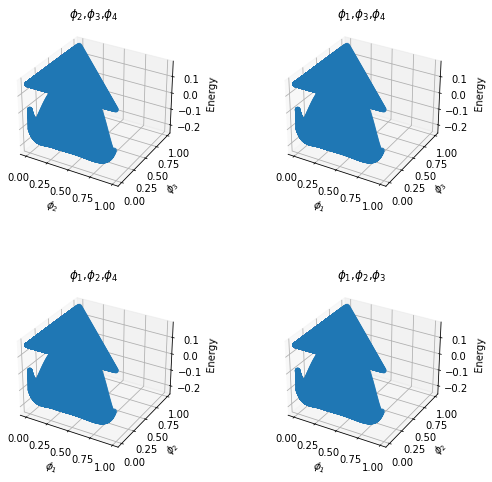

In [6]:
fig, axs = plt.subplots(2,2,figsize=(2*4,2*4),subplot_kw={'projection':'3d'})
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axs = axs.flatten()
for i,ax in enumerate(axs):
    proj_ids = ~np.isclose(engine.grid[i,:],0, atol=0.01)
    if PLOT_BOUNDARIES:
        ids = np.logical_and(proj_ids,~boundary_points)
    else:
        ids = proj_ids
    plotids = list(set([0,1,2,3])-set([i]))
    ax.scatter(engine.grid.T[ids,plotids[0]],engine.grid.T[ids,plotids[1]], 
               engine.energy[ids])
    ax.set_xlabel(r'$\phi_{}$'.format(plotids[0]+1))
    ax.set_ylabel(r'$\phi_{}$'.format(plotids[1]+1))
    ax.set_zlabel('Energy')
    title = ','.join(r'$\phi_{}$'.format(i+1) for i in plotids)
    ax.set_title(title)
plt.show()

In [7]:
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{'type':'scene'},{'type':'scene'}],
                           [{'type':'scene'},{'type':'scene'}]]
                   )
row_col_ids = [[1,1],[1,2],[2,1],[2,2]]
scenes = ['scene','scene2','scene3','scene4']
marker = dict(size=3)
for i in [0,1,2,3]:
    row, col = row_col_ids[i]
    proj_ids = ~np.isclose(engine.grid[i,:],0, atol=0.01)
    if PLOT_BOUNDARIES:
        ids = np.logical_and(proj_ids,~boundary_points)
    else:
        ids = proj_ids
    plotids = list(set([0,1,2,3])-set([i]))
    name = ','.join(str(i+1) for i in plotids)
    trace = go.Scatter3d(x=engine.grid.T[ids,plotids[0]], y=engine.grid.T[ids,plotids[1]],
                         z = engine.energy[ids],
                        mode='markers', marker = marker, name=name, opacity=0.5)
    fig.add_trace(trace, row=row,col=col)
    fig['layout'][scenes[i]].update(
        dict(xaxis_title='phi{}'.format(plotids[0]),yaxis_title='phi{}'.format(plotids[1]),
             zaxis_title='Energy', aspectmode='cube')
    )

fig.update_layout(width=700, margin=dict(r=10, l=10, b=10, t=10))
fig.write_html('../figures/notebooks/2.html')